In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

In [86]:
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [87]:
data.shape

(891, 12)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing values
1.Deleting Rows
2.Impute missing values for continuous variable
3.Impute missing values for categorical variable
4.Other Imputation Methods
5.Using Algorithms that support missing values
6.Prediction of missing values
Imputation using Deep Learning Library — Datawig

# Imputing with mean and mode values

<AxesSubplot:>

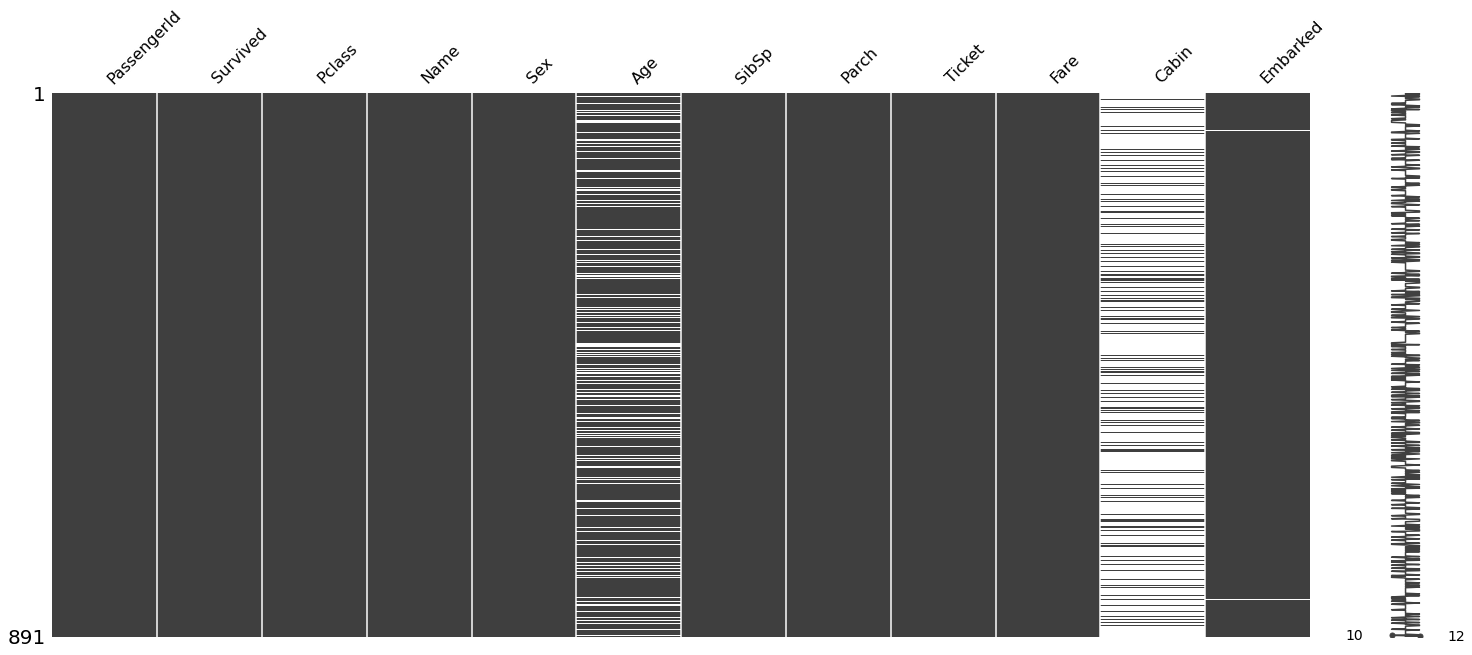

In [8]:
#Visualising missing values using missingno matrix
msno.matrix(data)

<AxesSubplot:>

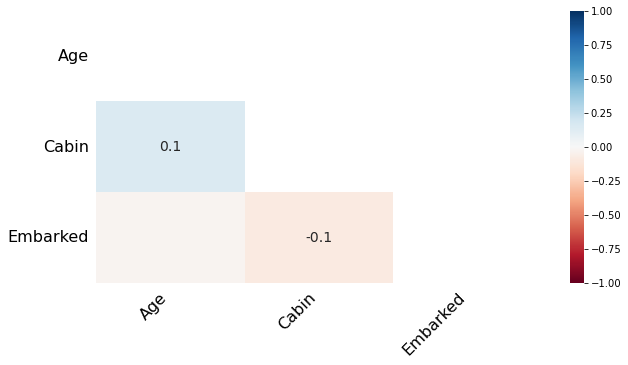

In [10]:
msno.heatmap(data)

In [32]:
data.iloc[:,5].shape

(891,)

In [39]:
age_col = data.iloc[:,5].values

In [48]:
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
data['Age'] = imputer.fit_transform(data['Age'].values.reshape(-1,1))

<AxesSubplot:>

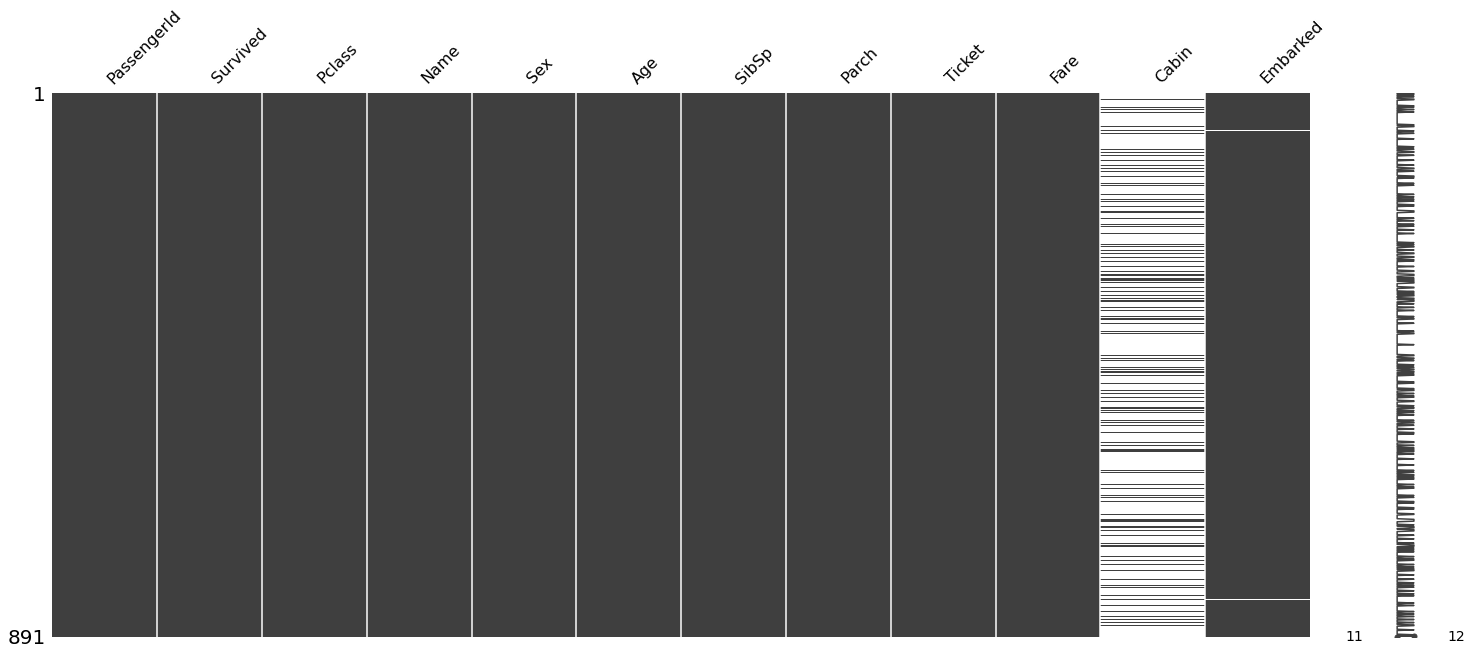

In [49]:
msno.matrix(data)

In [59]:
imputer = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
data['Cabin'] = imputer.fit_transform(data['Cabin'].values.reshape(-1,1))

# KNN imputation

In [61]:
from sklearn.impute import KNNImputer

In [100]:
data2 = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [76]:
data2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
#creating a KNNImputer instace
imputer = KNNImputer(n_neighbors=3)
data2['Age'] = imputer.fit_transform(data['Age'].values.reshape(-1,1))

# Label Encoding 

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
encoder = LabelEncoder()

In [95]:
vals = encoder.fit_transform(data["Cabin"])

In [96]:
vals.shape

(891,)

In [88]:
vals

array([ 47,  81,  47,  55,  47,  47, 129,  47,  47,  47, 145,  49,  47,
        47,  47,  47,  47,  47,  47,  47,  47, 111,  47,  13,  47,  47,
        47,  63,  47,  47,  47,  41,  47,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,
       101,  47,  23,  71,  47,  47,  47,  47,  47,  21,  80,  47,  47,
        47, 142,  47,  47,  47,  47,  47,  47,  47,  47, 140,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  63,  47,  47,
        47, 122,  47,  47,  47,  12,  91,  47,  47,  47,  47,  98,  47,
        47,  47,  47,  47,  47,  47,  52,  47,  47,  47,  47,  47,  47,
        47,  36,  47,  47,  47,  47, 116,  98,  47,  47,  47, 138,  47,
        47,  47,  47,  47,  47,  47, 107,  55,  47,  45,  47,  47,  47,
        47,  47,  47,  47,  47, 141,  47,  47,  61,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47, 123,  47,  47,
        47,  18,  47,  47,  47,  14,  47,  47,  69,  47,  47,  4

In [97]:
encoder.inverse_transform(vals)

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

# One Hot Encoding

In [102]:
data_cabin = data2["Cabin"].dropna()
data_cabin.shape

(204,)

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
enc = OneHotEncoder()
fin = enc.fit_transform(data_cabin[:5].values.reshape(-1,1))

In [114]:
fin

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

A sparse matrix is a matrix in which most of its elements are zero. Since storing all those zeros in memory can be wasteful, sparse matrices are represented in a compact form that only includes the non-zero elements along with their row and column indices. This can significantly reduce memory usage and improve computational efficiency for operations involving sparse matrices.

In [119]:
# enc = OneHotEncoder(sparse=False)
fin = enc.fit_transform(data_cabin[:5].values.reshape(-1,1))

In [120]:
pd.DataFrame(fin)

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


# 